# Imports

In [ ]:
import pandas as pd
import seaborn as sns

# Reading the Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/fabagaipo/cmsc173ml/main/datasets/glass.csv'
df = pd.read_csv(url, header=None)
df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Target"]
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.shape

(214, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


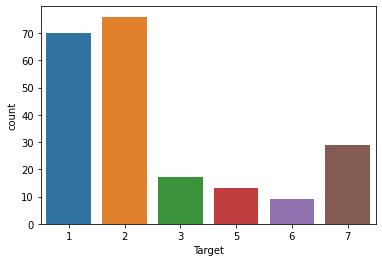

In [ ]:
sns.countplot(df['Target'])

In [ ]:
df.corr()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Target
Feature1,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Feature2,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Feature3,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Feature4,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Feature5,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Feature6,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Feature7,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Feature8,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Feature9,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Target,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


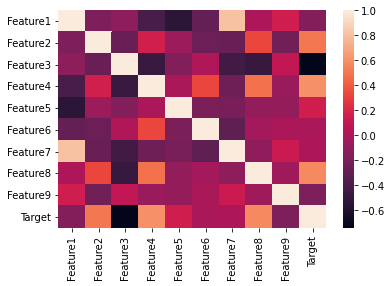

In [ ]:
sns.heatmap(df.corr())

# Cleaning the Dataset

In [ ]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Feature9    0
Target      0
dtype: int64

In [ ]:
len(df[df.duplicated()])

1

In [ ]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [ ]:
df['Target'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Target, dtype: int64

# Splitting data

In [ ]:
X = df.drop('Target',axis=1)
y=df['Target']
test_size = 0.2     # 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=888)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

# Model Evaluation with Imbalanced Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier()

In [ ]:
y_train.value_counts()

2    60
1    52
7    24
3    15
5    11
6     8
Name: Target, dtype: int64

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_original = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy_original))

Accuracy: 0.605%


In [ ]:
report_original = classification_report(y_test, y_pred)
print(report_original)

              precision    recall  f1-score   support

           1       0.50      0.65      0.56        17
           2       0.64      0.56      0.60        16
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.60      0.75         5

    accuracy                           0.60        43
   macro avg       0.69      0.63      0.65        43
weighted avg       0.62      0.60      0.60        43



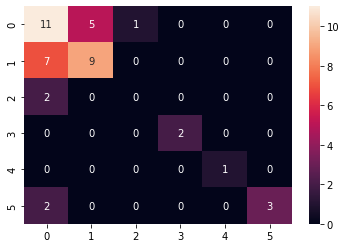

In [ ]:
confusionMatrix_original = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_original, annot=True, fmt=".0f")

# Handling Imbalanced Dataset

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


---
- Undersampling Method

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

1    8
2    8
3    8
5    8
6    8
7    8
Name: Target, dtype: int64

In [ ]:
model.fit(X_resampled_under, y_resampled_under)
y_pred_under = model.predict(X_test)

In [ ]:
accuracy_under = accuracy_score(y_test, y_pred_under)
print("Accuracy: %.3f%%" % (accuracy_under))

Accuracy: 0.488%


In [ ]:
report_under = classification_report(y_test, y_pred_under)
print(report_under)

              precision    recall  f1-score   support

           1       0.47      0.41      0.44        17
           2       0.64      0.44      0.52        16
           3       0.10      0.50      0.17         2
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      0.60      0.75         5

    accuracy                           0.49        43
   macro avg       0.62      0.66      0.59        43
weighted avg       0.60      0.49      0.52        43



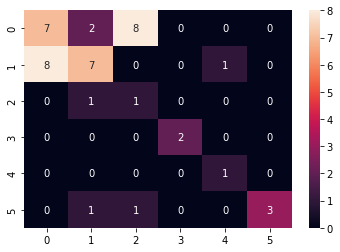

In [ ]:
confusionMatrix_under = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_under, annot=True, fmt=".0f")

---
- Oversampling Method

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled_over, y_resampled_over = ros.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

2    60
3    60
1    60
5    60
6    60
7    60
Name: Target, dtype: int64

In [ ]:
model.fit(X_resampled_over, y_resampled_over)
y_pred_over = model.predict(X_test)

In [ ]:
accuracy_over = accuracy_score(y_test, y_pred_over)
print("Accuracy: %.3f%%" % (accuracy_over))

Accuracy: 0.558%


In [ ]:
report_over = classification_report(y_test, y_pred_over)
print(report_over)

              precision    recall  f1-score   support

           1       0.54      0.41      0.47        17
           2       0.64      0.56      0.60        16
           3       0.20      1.00      0.33         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.60      0.75         5

    accuracy                           0.56        43
   macro avg       0.73      0.76      0.69        43
weighted avg       0.65      0.56      0.58        43



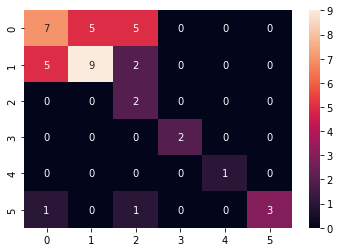

In [ ]:
confusionMatrix_over = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_over, annot=True, fmt=".0f")

# Evaluation

With the original dataset, we can see the accuracy results of 60% for predicting the glass targets. However, this accuracy is unreliable as we see how uneven each class is from each other. This is the definition of imbalanced datasets. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class. As can be seen in the report for the original dataset, the metrics of class=1, class=2 and class=3 are low. Although our model has a high accuracy, the accuracy only reflects that of class=5 and class=6.

After handling our imbalanced dataset with the methods of oversampling and undersampling, we see the accuracy drop down from the results of the original dataset (undersampling = 49% and oversampling = 56%). This is a significant decrease from that of the original report. According to the model, the prediction of the other high metric classes has decreased, but there is also an increase in the recall metric of the lower valued classes, which means that the rate of predicting those lower of the model increased.